# Hyperbolic Geometry Exploration

Most of the code in this notebook is strongly based on the [examples provided by Hyperbolic library](https://github.com/cduck/hyperbolic/tree/master/examples).

In [8]:
pip install jupyter

  Obtaining dependency information for notebook from https://files.pythonhosted.org/packages/85/76/51777158391e1784cc5a892ff355fd0a0b0b5189aeffce9baf51f514b9a2/notebook-7.0.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for nbconvert from https://files.pythonhosted.org/packages/51/bd/ede955c9e981abf6d0e12a7583fd0f9256eedfb461073f25045770f3e717/nbconvert-7.7.3-py3-none-any.whl.metadata
  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/b8/d4/ce436660098b2f456e2b8fdf76d4f33cbc3766c874c4aa2f772c7a5e943f/ipywidgets-8.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.7 from https://files.pythonhosted.org/packages/8e/d4/d31b12ac0b87e8cc9fdb6ea1eb6596de405eaaa2f25606aaa755d0eebbc0/widgetsnbextension-4.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.7 from htt

In [9]:
pip install hyperbolic

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/c9/57/3cb8131a0e6d559501e088d3e685f4122e9ff9104c4b63e4dfd3a577b491/numpy-1.25.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for drawsvg~=2.0 from https://files.pythonhosted.org/packages/27/4f/65d72a014026495d8d2847e66bbe542cf899e50f087a50e0abab9c58ef3c/drawsvg-2.3.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 32.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install quads

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7e/2c/1e25437f4419f2828bbd213be42c8fd23a3b795c5c4bb776987d177fc615/matplotlib-3.7.2-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/92/4d/fe7a7098d98a8889252105193f5e869532f9dc37e39d917a82d2b0b874a1/contourpy-1.1.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/e8/e0/d1a65471a945b0764ee17ce4afb59af8761b33c4418ca35687639315fcb7/fonttools-4.42.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 2.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.4 MB/s eta 0:00:00
  Obtaining dependency information for pillow>=6.2.0 from https://files.pythonhosted.org/pack

In [15]:
import drawsvg as draw
from drawsvg import Drawing
from hyperbolic import euclid, util
from hyperbolic.poincare import *
import math
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import quads
import random

### Hyperbolic Line and Hyperbolic Line Segment

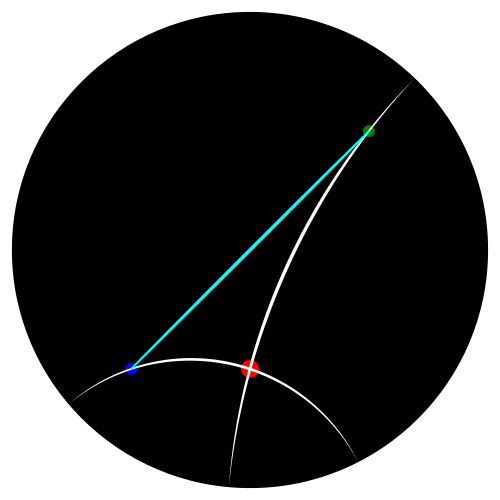

In [19]:
p1 = Point(0.0,  0.5)
p2 = Point(0.5, -0.5)
p3 = Point(-0.5, 0.5)

# Create hyperbolic line (segment) connecting p1 and p2.
# If segment==false, the hyperbolic line will extend towards
# the boundaries of the Poincaré disk.
p1p2_line = Line.from_points(*p1, *p2, segment=False)
p1p3_line = Line.from_points(*p1, *p3, segment=False)
p2p3_line = Line.from_points(*p2, *p3, segment=True)

width = height = 2.1
d = Drawing(width, height, origin='center')

# Draws a circle with center (0.0, 0.0) and radius 1.0, 
# representing the interior of the Poincaré disk.
center = (0.0, 0.0)
radius = 1.0
d.draw(euclid.Circle(*center, radius), fill='black')

# Draws points in the Poincaré disk
d.draw(p1, hradius=0.1, fill='red')
d.draw(p2, hradius=0.1, fill='green')
d.draw(p3, hradius=0.1, fill='blue')

# Draw hyperbolic line connecting p1 and p2;
# notice that the line is infinite since it
# is extended towards the boundary of the disk.
d.draw(p1p2_line, hwidth=0.03, fill='white')
d.draw(p1p3_line, hwidth=0.03, fill='white')
# Draw  hyperbolic line Segment i.e., segment
# with finite extent
d.draw(p2p3_line, hwidth=0.03, fill='cyan')

d.set_render_size(w=500)
d.save_svg('hyperbolic_line.svg')
d # This will render the image in the output cell

### Hyperbolic Hexagon

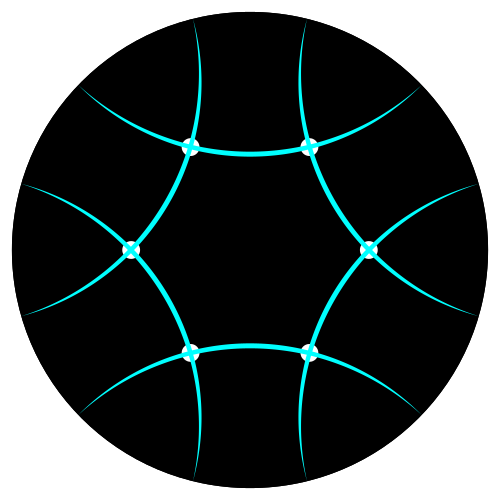

In [20]:
r = 0.5
points = []
for idx in range(6):
    angle = math.radians(idx * 60)
    points.append(Point(r * math.cos(angle), r * math.sin(angle)))

lines = []
for idx in range(6):
    start = idx % 6
    end = (idx + 1) % 6
    lines.append(Line.from_points(*points[start], *points[end], segment=False))

# Draws a circle with center (0.0, 0.0) and radius 1.0, 
# representing the interior of the Poincaré disk.
center = (0.0, 0.0)
radius = 1.0
d.draw(euclid.Circle(*center, radius), fill='black')

for point in points:
    d.draw(point, hradius=0.1, fill='white')
    
for line in lines:
    d.draw(line, hwidth=0.05, fill='cyan')

d.set_render_size(w=500)
d.save_svg('hyperbolic_hexagon.svg')
d # This will render the image in the output cell

### Euclidean Quadtree

In [193]:
# Domain centered at the origin and in range [-1; 1]
tree = quads.QuadTree((0, 0), 2.0, 2.0)

# Generate points inside Poincaré disk
points = []
num_points = 100

while len(points) != num_points:
    x = random.uniform(-1.0, 1.0)
    y = random.uniform(-1.0, 1.0)
    
    # Test if point is inside Poincaré disk,
    # but not on the boundary.
    if x**2 + y**2 < 1.0:
        points.append((x, y))
        tree.insert((x, y))

points = np.array(points)
start = quads.BoundingBox(min_x=-1, min_y=-1, max_x=1, max_y=1)
# Lib seems to be broken? Center of box from (-1, -1) to (1, 1) should be (0, 0)?
#print(start.center) # Returns (1.0, 1.0), but should be (0, 0) ?
# self.center = Point(self.half_width, self.half_height)

def bbox_center(bounding_box):
    return quads.Point((bounding_box.max_x + bounding_box.min_x) / 2, (bounding_box.max_y + bounding_box.min_y) / 2)

#print(bbox_center(start)) # Seems correct?

def split(parent) -> list:    
    #center = parent.center # Seems to be broken?
    center = bbox_center(parent)
    
    return [ 
        # Upper-Right Node
        quads.BoundingBox(min_x=center.x, min_y=center.y,
                      max_x=center.x + parent.half_width, max_y=center.y + parent.half_height),
        # Upper-Left Node
        quads.BoundingBox(min_x=center.x - parent.half_width, min_y=center.y,
                      max_x=center.x, max_y=center.y + parent.half_height),
        # Lower-Left Node
        quads.BoundingBox(min_x=center.x - parent.half_width, min_y=center.y - parent.half_height,
                      max_x=center.x, max_y=center.y),
        # Lower-Right Node TODO
        quads.BoundingBox(min_x=center.x, min_y=center.y - parent.half_height,
                      max_x=center.x + parent.half_width, max_y=center.y),
    ]
            

split(start)

[<BoundingBox: (0.0, 0.0) to (1.0, 1.0)>,
 <BoundingBox: (-1.0, 0.0) to (0.0, 1.0)>,
 <BoundingBox: (-1.0, -1.0) to (0.0, 0.0)>,
 <BoundingBox: (0.0, -1.0) to (1.0, 0.0)>]

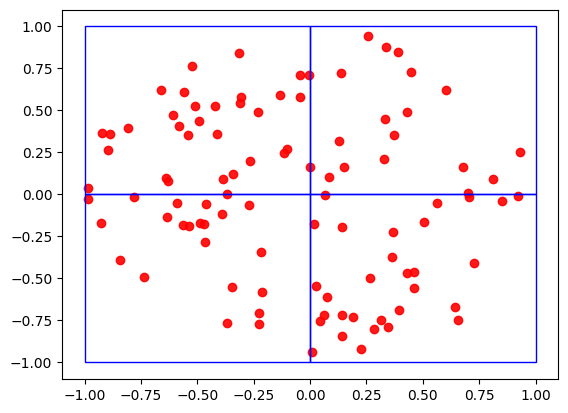

In [194]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(
    x=points[:, 0],
    y=points[:, 1],
    marker='o', alpha=0.9, color='red')

for children in split(start):
    ax.add_patch(
        patches.Rectangle(
            xy=(children.min_x, children.min_y),
            width=children.width, height=children.height, linewidth=1,
            color='blue', fill=False))

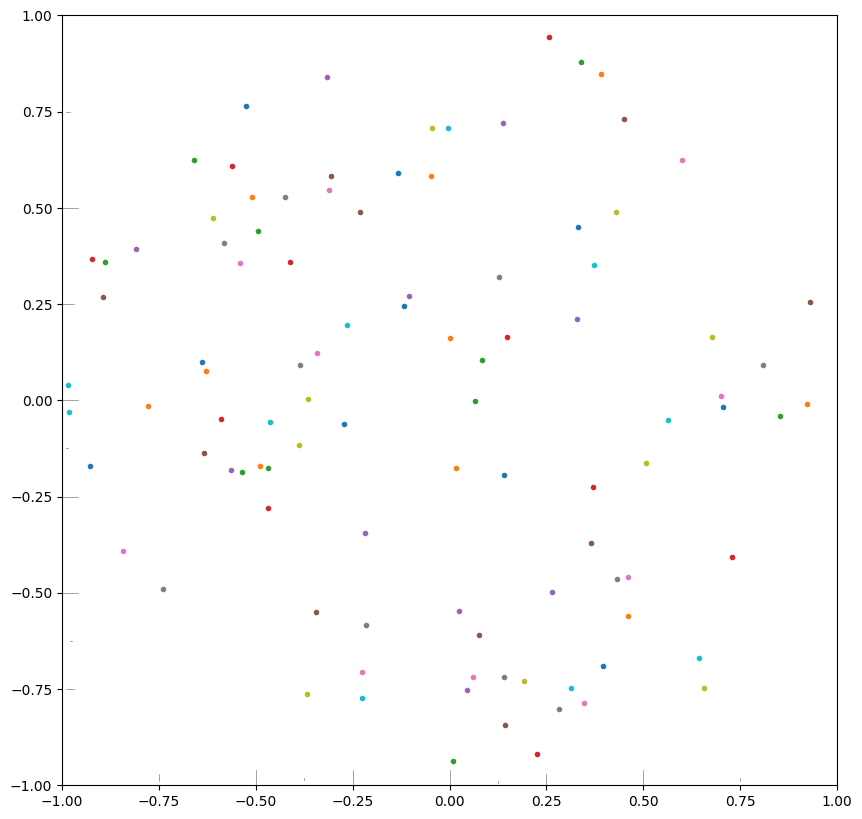

In [195]:
quads.visualize(tree)

### Polar Quadtree (Equal Area Splitting)

In [196]:
def cartesian_to_polar(points):
    """
    Args
        points: ndarray containing points in Cartesian coordinates.
    
    Returns
        ndarray: points in polar coordinates, where the first column is the
        radius and the second column is the angle (in radians).
    """
    assert points.shape[1] == 2
    return np.column_stack((np.sqrt(points[:, 0]**2 + points[:, 1]**2), np.arctan2(points[:, 1], points[:, 0])))

polar_points = cartesian_to_polar(points)
assert points.shape == polar_points.shape

In [197]:
np.max(polar_points[:, 0])

0.9942286370751965

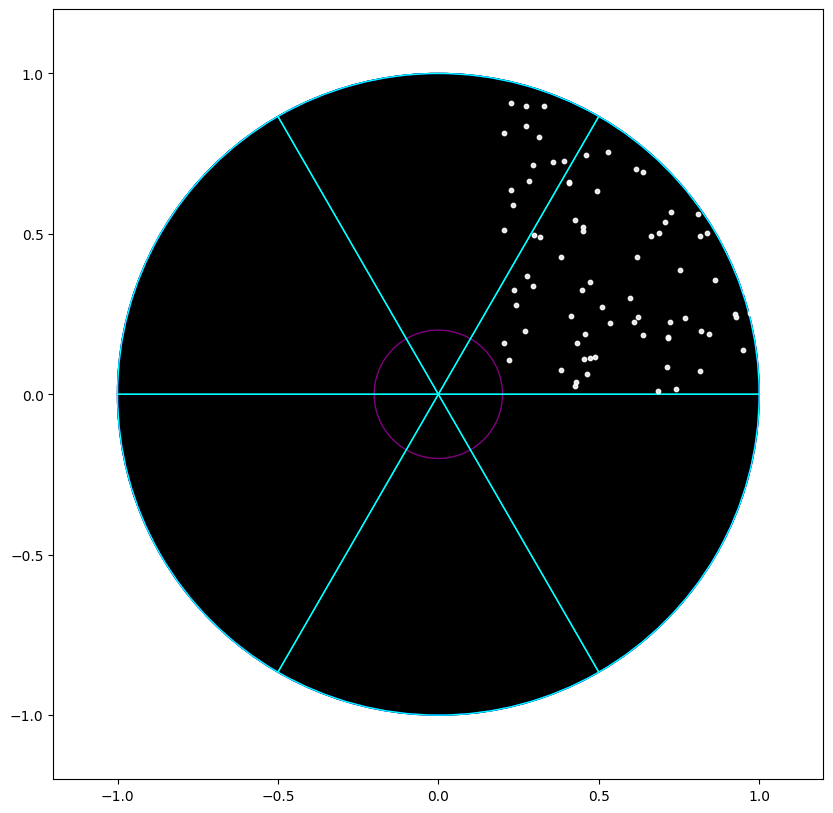

In [198]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Draw Poincaré disk
poincare_boundary = plt.Circle((0, 0), 1.0, color='black')
inner_circle = plt.Circle((0, 0), 0.2, color='purple', fill=False)
outer_circle = plt.Circle((0, 0), 1.0, color='blue', fill=False)

ax.add_patch(poincare_boundary)
ax.add_patch(inner_circle)
ax.add_patch(outer_circle)

# Define angles for splitting into 6 sections
angles = [0, 60, 120, 180, 240, 300, 360]  # 6 sections

for i in range(len(angles) - 1):
    theta1 = angles[i]
    theta2 = angles[i + 1]
    wedge = patches.Wedge((0, 0), r=1.0, theta1=theta1, theta2=theta2, color='cyan', fill=False)
    ax.add_patch(wedge)

# Example polar points data
num_points = 100
polar_points = np.random.rand(num_points, 2)
polar_points[:, 0] = 0.2 + 0.8 * polar_points[:, 0]  # Adjust radii

ax.scatter(
    x=polar_points[:, 0],
    y=polar_points[:, 1],
    marker='o', alpha=0.9, color='white', s=10.0)

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal', adjustable='box')
plt.show()


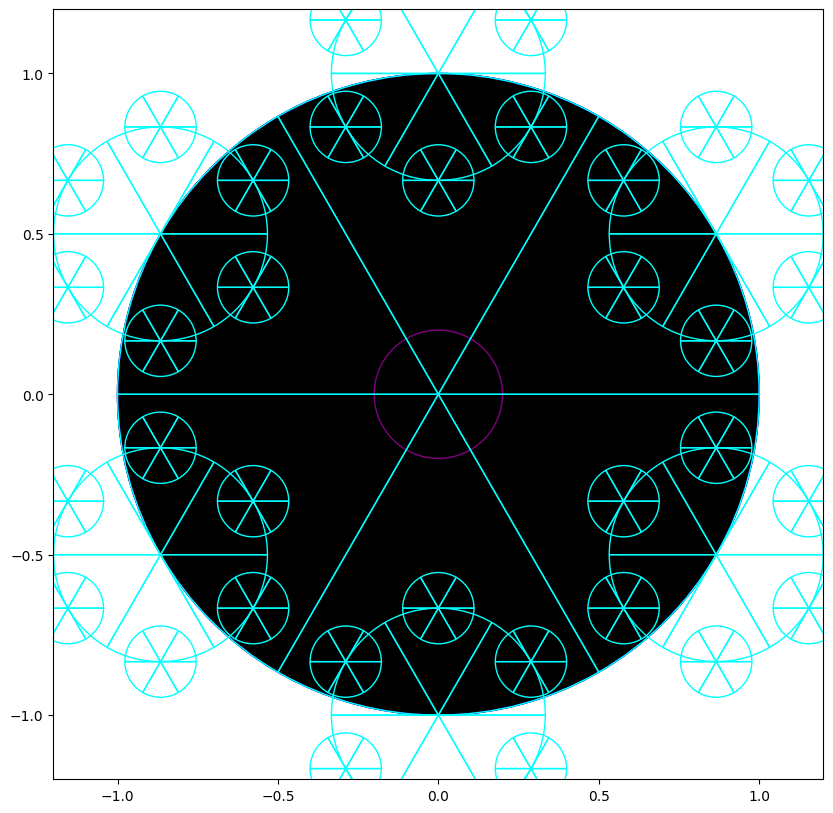

In [199]:
def plot_section(ax, center_x, center_y, radius, num_sections, depth):
    if depth <= 0:
        return

    angles = np.linspace(0, 360, num_sections + 1)
    for i in range(num_sections):
        theta1 = angles[i]
        theta2 = angles[i + 1]
        wedge = patches.Wedge((center_x, center_y), r=radius, theta1=theta1, theta2=theta2, color='cyan', fill=False)
        ax.add_patch(wedge)
        
        # Calculate the coordinates of the center of the new section
        mid_theta = (theta1 + theta2) / 2
        mid_x = center_x + radius * np.cos(np.radians(mid_theta))
        mid_y = center_y + radius * np.sin(np.radians(mid_theta))
        
        # Recursively split the new section
        plot_section(ax, mid_x, mid_y, radius / 3, num_sections, depth - 1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Draw Poincaré disk
poincare_boundary = plt.Circle((0, 0), 1.0, color='black')
inner_circle = plt.Circle((0, 0), 0.2, color='purple', fill=False)
outer_circle = plt.Circle((0, 0), 1.0, color='blue', fill=False)

ax.add_patch(poincare_boundary)
ax.add_patch(inner_circle)
ax.add_patch(outer_circle)

plot_section(ax, 0, 0, 1.0, num_sections=6, depth=3)  # Adjust the depth as needed

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal', adjustable='box')
plt.show()

In [200]:
def polar_point_based_split(points_in_wedge):
    angles = [normalize_angle(point[1]) for point in points_in_wedge]
    sorted_angles = np.sort(angles)
    median_angle = np.median(sorted_angles)
    return median_angle

In [201]:

def polar_radius_based_split(points_in_wedge):
    radii = [point[0] for point in points_in_wedge]
    sorted_angles = np.sort(radii)
    median_radius= np.median(sorted_angles)

    median_radius = np.median(radii)
    return median_radius

In [202]:

def polar_array_split(points_in_wedge):
    median_idx = len(points_in_wedge) // 2
    points_left = points_in_wedge[:median_idx]
    points_right = points_in_wedge[median_idx:]
    return points_left, points_right

In [203]:
def normalize_angle(angle):
    return (angle + 2*np.pi) % (2*np.pi)  # Normalize to [0, 2*pi] range

In [217]:
def radius(points):
    radii = [point[0] for point in points]
    sorted_angles = np.sort(radii)
    max_radius= np.max(sorted_angles)
    min_radius = np.min(sorted_angles)
    
    radius = max_radius - min_radius
    print("Radius: " + str(radius))
    return radius
    

In [218]:

def minpoint(points):
    min_radius = min(point[0] for point in points)
    min_radius_point = [point for point in points if point[0] == min_radius][0]
    print("Start: " + str(min_radius_point))
    return min_radius_point



Start: [ 0.40945892 -2.0238169 ]
Radius: 0.5638007698505546
Degrees: 282.98560468249013
Start: [ 0.67191741 -0.99522733]
Radius: 0.30134227589404683
Degrees: 48.853066892573985
Start: [ 0.67191741 -0.99522733]
Radius: 0.28999456246711786
Degrees: 247.35063886011432
Start: [ 0.74338176 -1.01464765]
Radius: 0.22987792391101336
Degrees: 282.98560468249013
Start: [ 0.40945892 -2.0238169 ]
Radius: 0.24966924851159167
Degrees: 29.90883453500691
Start: [0.56118136 1.53170483]
Radius: 0.09794680748506635
Degrees: 221.64647847615717
Start: [ 0.40945892 -2.0238169 ]
Radius: 0.073375003531855
Degrees: 292.3394464758292


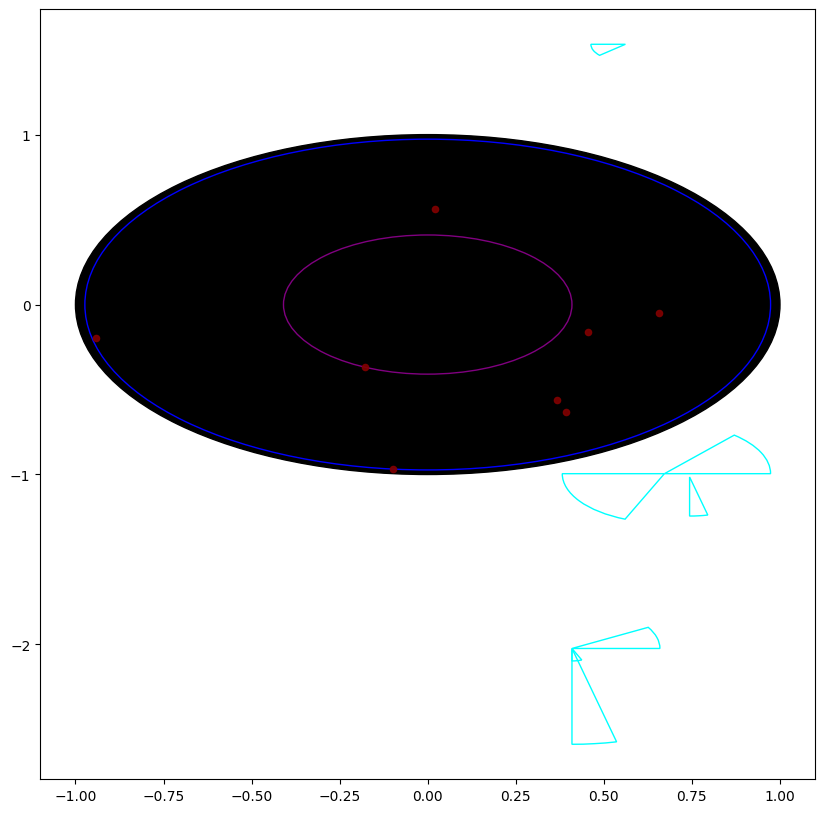

In [225]:


def recursive_subdivision(points_in_wedge, alternate_split=True):
    if len(points_in_wedge) <= 1:
        return
    
    if alternate_split:
        split_value = polar_point_based_split(points_in_wedge)
    else:
        split_value = polar_radius_based_split(points_in_wedge)
    
    # Split points into two halves
    points_left, points_right = polar_array_split(points_in_wedge)
    
    
    #calculates the pieces of the wedge
    start = minpoint(points_in_wedge)
    segment_radius = radius(points_in_wedge)
    angle_degrees = np.degrees(split_value)
    print("Degrees: " + str(angle_degrees))


    #draws the wedges
    if angle_degrees >= 0 and angle_degrees <= 90:  # First quadrant
        fig.gca().add_patch(patches.Wedge(start, r=segment_radius, theta1=0, theta2=angle_degrees, color='cyan', fill=False))
    elif angle_degrees > 90 and angle_degrees <= 180:  # Second quadrant
        fig.gca().add_patch(patches.Wedge(start, r=segment_radius, theta1=90, theta2=angle_degrees, color='cyan', fill=False))
    elif angle_degrees > 180 and angle_degrees <= 270:  # Third quadrant
        fig.gca().add_patch(patches.Wedge(start, r=segment_radius, theta1=180,theta2=angle_degrees, color='cyan', fill=False))
    else:  # Fourth quadrant
        fig.gca().add_patch(patches.Wedge(start, r=segment_radius, theta1=270, theta2=angle_degrees, color='cyan', fill=False))
   
    
    # Call the function recursively
    recursive_subdivision(points_left, not alternate_split)
    recursive_subdivision(points_right, not alternate_split)


# Generate points inside Poincaré disk
points = []
num_points = 8
while len(points) != num_points:
    x = random.uniform(-1.0, 1.0)
    y = random.uniform(-1.0, 1.0)
    
    # Test if point is inside Poincaré disk,
    # but not on the boundary.
    if x**2 + y**2 < 1.0:
        points.append((x, y))
        tree.insert((x, y))

points = np.array(points)
polar_points = cartesian_to_polar(points)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Draw Poincaré disk
poincare_boundary = plt.Circle((0, 0), 1.0, color='black')
inner_circle = plt.Circle((0, 0), np.min(polar_points[:, 0]), color='purple', fill=False)
outer_circle = plt.Circle((0, 0), np.max(polar_points[:, 0]), color='blue', fill=False)

ax.add_patch(poincare_boundary)
ax.add_patch(inner_circle)
ax.add_patch(outer_circle)

# Call the recursive subdivision function
points_in_wedge = polar_points  # Initially all points are in the wedge
recursive_subdivision(points_in_wedge)

ax.scatter(
    x=points[:, 0],
    y=points[:, 1],
    marker='o', alpha=0.9, color='maroon', s=20.0)


In [94]:
def polar_equal_area_split(min_r, max_r, min_theta, max_theta, alfa=1.0):
    """
    Args
        min_r, max_r (float): polar radius range of current node
        min_theta, max_theta (float): angles (in degrees) range of the current node
    """
    return (np.arccosh((np.cosh(alfa * max_r) + np.cosh(alfa * min_r)) / 2.0) * (1.0 / alfa), (min_theta + max_theta) / 4)

0.7525342476772553 1.5707963267948966
0.5594288868861472 0.39269908169872414
0.426914658139728 0.09817477042468103
0.3403454382020251 0.02454369260617026
0.2869651807696396 0.006135923151542565
0.25600015696760703 0.0015339807878856412
0.2389811563369132 0.0003834951969714103
0.22999027631060404 9.587379924285257e-05
0.7525342476772553 1.5707963267948966
0.5594288868861472 0.39269908169872414
0.426914658139728 0.09817477042468103
0.3403454382020251 0.02454369260617026
0.2869651807696396 0.006135923151542565
0.25600015696760703 0.0015339807878856412
0.2389811563369132 0.0003834951969714103
0.22999027631060404 9.587379924285257e-05


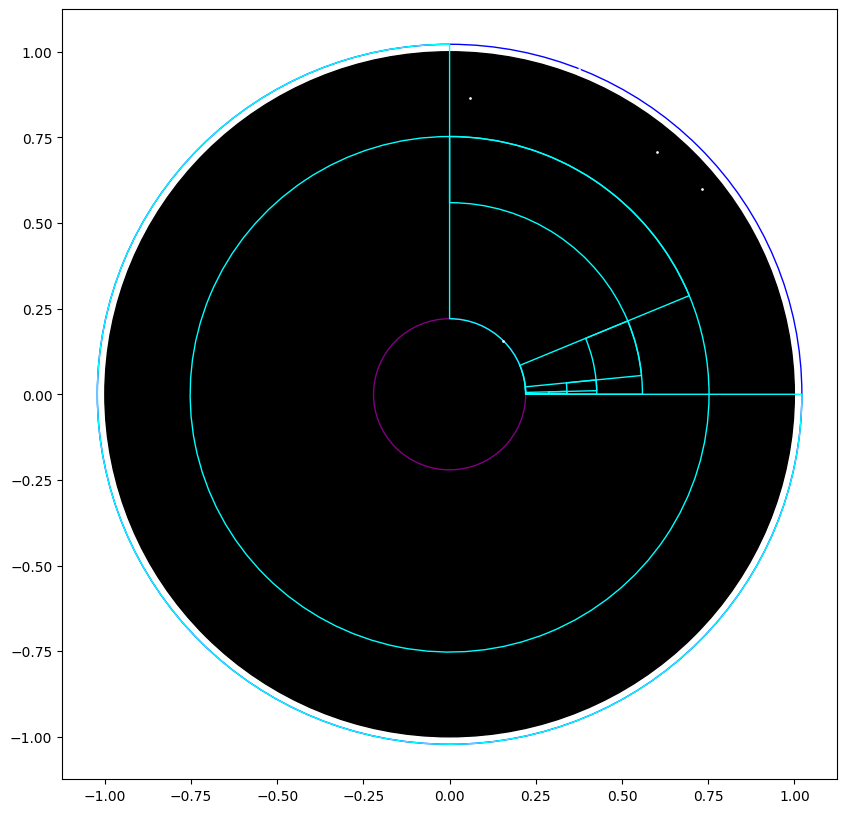

In [95]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Draw Poincaré disk
poincare_boundary = plt.Circle((0, 0), 1.0, color='black')
#inner_circle = plt.Circle((0, 0), np.min(polar_points[:, 0]), facecolor='red', edgecolor='purple')
inner_circle = plt.Circle((0, 0), np.min(polar_points[:, 0]), color='purple', fill=False)
outer_circle = plt.Circle((0, 0), np.max(polar_points[:, 0]), color='blue', fill=False)

# Angles in **degrees**; draws a wedge starting at r-width and ending at r, ranging from theta1 to theta2
#wedge = patches.Wedge((0, 0), r=0.5, theta1=30, theta2=60, width=0.2, color='cyan', fill=False)
#ax.add_patch(wedge)
ax.add_patch(poincare_boundary)
ax.add_patch(inner_circle)
ax.add_patch(outer_circle)

# NOTE: better to keep all calculations in radians and *only* convert it to
# degrees when it is time to display the result using patches.Wed
# TODO: refactor the following into a separate class storing PolarNodes
min_r, max_r, min_theta, max_theta = np.min(polar_points[:, 0]), np.max(polar_points[:, 0]), 0.0, 2 * np.pi
for _ in range(8):
    mid_r, mid_theta = polar_equal_area_split(min_r, max_r, 0.0, max_theta)
    print(mid_r, mid_theta)
    wedge = patches.Wedge((0, 0), r=max_r, theta1=np.degrees(mid_theta), theta2=np.degrees(max_theta), width=(max_r - mid_r), color='cyan', fill=False)
    ax.add_patch(wedge)
    
    max_r = mid_r
    max_theta = mid_theta

min_r, max_r, min_theta, max_theta = np.min(polar_points[:, 0]), np.max(polar_points[:, 0]), 0.0, 2 * np.pi
for _ in range(8):
    mid_r, mid_theta = polar_equal_area_split(min_r, max_r, 0.0, max_theta)
    print(mid_r, mid_theta)
    wedge = patches.Wedge((0, 0), r=mid_r, theta1=0, theta2=np.degrees(mid_theta), width=(mid_r - min_r), color='cyan', fill=False)
    ax.add_patch(wedge)
    
    max_r = mid_r
    max_theta = mid_theta
    
ax.scatter(
    x=[points[:, 0]],
    y=[points[:, 1]],
    marker='o', alpha=0.9, color='white', s=1.0)